In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotting
from main import *

/Users/fred/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
# We track the development of a select set of nodes.
track = [
    'i',
    'e',
    'o',
    'ke',
    'D@ts',
    '[o ke]',
    'DEn',
    'k^m',
    'hir',
    'an',
    '[k^m hir]',
    '[k^m an]',
    'gEt',
    'mi',
    'yu',
    'yuR',
    'dWn',
    'sterz',
    '[dwn sterz]',
    'tIG',
    '[i tIG]',
    'mI',
    'sIG',
    '[mI sIG]',
    'yE',
    'lo',
    '[yE lo]',
]

In [ ]:
params = {'DECAY_RATE': .0001,
          'FTP_PREFERENCE': 0.5,
          'CHUNK_THRESHOLD': 0.3}
corpus = syl_corpus()
model, history = train(corpus,
                       utterances=10000,
                       track=track,
                       sample_rate=100,
                       model_params=params,
                      )
graph = model.graph
print('num nodes: ', len(graph.nodes))

In [32]:
# Parse a few adult utterances.
for _ in range(10):
    print(model.parse_utterance(next(corpus)))

(# | yu | [[wa nx] gEt] | In | #)
(# | If | Y | pUt | yu | In | yu | wont | lYk | [It #])
(# | yu | [wa nx] | go | In | dont | yu | #)
(# | yu | [wa nx] | go | In | #)
(# | [h^ #])
(# | [brU klIn] | #)
(# | gEt | [dWn #])
(# | yEs | #)
(# | go | [x we] | #)
([# yu] | tEl | mi | tu | go | [x we] | #)


In [38]:
# Attempt to recreate adult utterances given a bag of words.
for _ in range(10):
    utt = next(corpus)
    print()
    print('ADULT:', ' '.join(utt))
    try:
        print('MODEL:', model.speak(utt))
    except KeyError as e:
        print(e)


ADULT: xm hxm
MODEL: [xm hxm]

ADULT: yu yur nat e sR kxs pR fcr mR
'kxs is not in the graph.'

ADULT: yu k@nt wck x lcG D^ re lIG
MODEL: [[[yu k@nt] [wck x]] [[D^ lcG] [re lIG]]]

ADULT: o lUk @t D@t
MODEL: [[lUk @t] [o D@t]]

ADULT: yEs
MODEL: yEs

ADULT: du IG D@t spI tIG TIG x gEn
MODEL: [[TIG [x gEn]] [[spI tIG] [[du IG] D@t]]]

ADULT: so yu g^ nx go tu D^ dor bY yUr sElf h^
MODEL: [[[[g^ nx] go] [bY [yUr sElf]]] [[tu h^] [[so yu] [D^ dor]]]]

ADULT: o ke
MODEL: [o ke]

ADULT: o ke
MODEL: [o ke]

ADULT: o hE lo
MODEL: [o [hE lo]]


/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


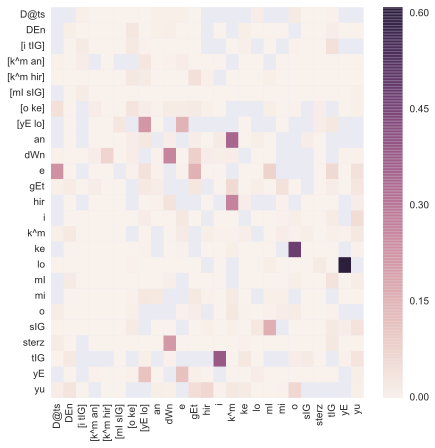

In [39]:
# The chunkability of a set of nodes. The first
# node in a pair is on the x axis.
plotting.heatmap(history[10000], figsize=(7,7))

/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


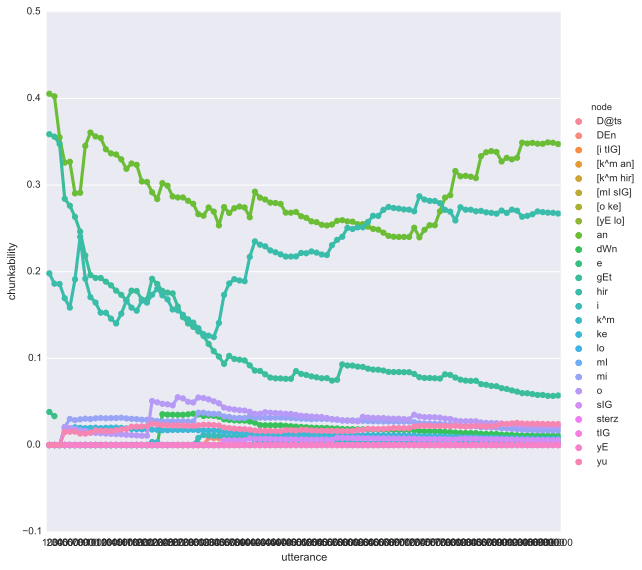

In [35]:
# Track the chunkability of nodes with /k^m/ ("come") over time.
mdf = node_frame(history, 'k^m', track)
sns.factorplot('utterance', 'chunkability', hue='node', data=mdf,
               markers='.', size=8,)

In [36]:
# See the relative contribution of each edge type.
# Note that these values are affected by the
# FTP_PREFERENCE parameter.
def weights(w1, w2):
    print(w1, w2)
    print('  FTP:', graph.edge_weight('ftp', graph[w1], graph[w2]))
    print('  BTP:', graph.edge_weight('btp', graph[w2], graph[w1]))

weights('yu', 'w^nt')
weights('k^m', 'an')
weights('k^m', 'hir')

yu w^nt
  FTP: 0.0830811866446
  BTP: 0.824561213164
k^m an
  FTP: 0.262837774734
  BTP: 0.459007769523
k^m hir
  FTP: 0.252040114799
  BTP: 0.283200985076
